In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
churndata = pd.read_csv('data/Churn_Modelling.csv')
churndata

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
churndata.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
churndata.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
churndata.Age = pd.cut(churndata.Age,bins=[0,18,65,79,99],labels=['Child','Young','Adult','Elderly'])
churndata

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,Young,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,Young,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,Young,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,Young,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,Young,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,Young,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,Young,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,Young,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,Young,3,75075.31,2,1,0,92888.52,1


In [6]:
print(len(churndata[churndata.Age=="Child"]))
print(len(churndata[churndata.Age=="Young"]))
print(len(churndata[churndata.Age=="Adult"]))
print(len(churndata[churndata.Age=="Elderly"]))

22
9714
249
15


In [7]:
churndata = churndata.drop(['RowNumber', 'CustomerId', 'Surname', 'Tenure'],1)
churndata

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,Young,0.00,1,1,1,101348.88,1
1,608,Spain,Female,Young,83807.86,1,0,1,112542.58,0
2,502,France,Female,Young,159660.80,3,1,0,113931.57,1
3,699,France,Female,Young,0.00,2,0,0,93826.63,0
4,850,Spain,Female,Young,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,Young,0.00,2,1,0,96270.64,0
9996,516,France,Male,Young,57369.61,1,1,1,101699.77,0
9997,709,France,Female,Young,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,Young,75075.31,2,1,0,92888.52,1


In [8]:
# label encoder
le = LabelEncoder()

churndata['Geography'] = le.fit_transform(churndata['Geography'])
churndata['Gender'] = le.fit_transform(churndata['Gender'])
churndata['Age'] = le.fit_transform(churndata['Age'])
churndata

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,3,0.00,1,1,1,101348.88,1
1,608,2,0,3,83807.86,1,0,1,112542.58,0
2,502,0,0,3,159660.80,3,1,0,113931.57,1
3,699,0,0,3,0.00,2,0,0,93826.63,0
4,850,2,0,3,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,3,0.00,2,1,0,96270.64,0
9996,516,0,1,3,57369.61,1,1,1,101699.77,0
9997,709,0,0,3,0.00,1,0,1,42085.58,1
9998,772,1,1,3,75075.31,2,1,0,92888.52,1


In [9]:
y = to_categorical(churndata["Exited"])

standardisation = StandardScaler()  
# Scaled feature 
churndata = standardisation.fit_transform(churndata) 
  
print ("\nAfter Standardisation : \n", churndata) 

X = churndata[:,:-1]
X, y


After Standardisation : 
 [[-0.32622142 -0.90188624 -1.09598752 ...  0.97024255  0.02188649
   1.97716468]
 [-0.44003595  1.51506738 -1.09598752 ...  0.97024255  0.21653375
  -0.50577476]
 [-1.53679418 -0.90188624 -1.09598752 ... -1.03067011  0.2406869
   1.97716468]
 ...
 [ 0.60498839 -0.90188624 -1.09598752 ...  0.97024255 -1.00864308
   1.97716468]
 [ 1.25683526  0.30659057  0.91241915 ... -1.03067011 -0.12523071
   1.97716468]
 [ 1.46377078 -0.90188624 -1.09598752 ... -1.03067011 -1.07636976
  -0.50577476]]


(array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
          0.97024255,  0.02188649],
        [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
          0.97024255,  0.21653375],
        [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
         -1.03067011,  0.2406869 ],
        ...,
        [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
          0.97024255, -1.00864308],
        [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
         -1.03067011, -0.12523071],
        [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
         -1.03067011, -1.07636976]]),
 array([[0., 1.],
        [1., 0.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [1., 0.]], dtype=float32))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)
print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_train", len(y_train))
print("y_test", len(y_test))

X_train 8000
X_test 2000
y_train 8000
y_test 2000


In [11]:
#get number of columns in training data
n_cols = X_train.shape[1]

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='softmax'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # for binary classification

In [12]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4768 - accuracy: 0.7939 - val_loss: 0.4344 - val_accuracy: 0.8138
Epoch 2/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8202 - val_loss: 0.4138 - val_accuracy: 0.8112
Epoch 3/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4029 - accuracy: 0.8217 - val_loss: 0.4117 - val_accuracy: 0.8181
Epoch 4/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3993 - accuracy: 0.8216 - val_loss: 0.4071 - val_accuracy: 0.8106
Epoch 5/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3935 - accuracy: 0.8225 - val_loss: 0.4057 - val_accuracy: 0.8188
Epoch 6/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3938 - accuracy: 0.8269 - val_loss: 0.4082 - val_accuracy: 0.8144
Epoch 7/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3887 - accuracy: 0.8291 - val_loss: 0.4064 - val_accuracy: 0.8112

Epoch 58/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3101 - accuracy: 0.8606 - val_loss: 0.4847 - val_accuracy: 0.8019
Epoch 59/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3083 - accuracy: 0.8630 - val_loss: 0.4970 - val_accuracy: 0.7906
Epoch 60/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3052 - accuracy: 0.8641 - val_loss: 0.5094 - val_accuracy: 0.7912
Epoch 61/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8586 - val_loss: 0.4880 - val_accuracy: 0.8000
Epoch 62/200
200/200 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.8636 - val_loss: 0.4889 - val_accuracy: 0.7969
Epoch 63/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3033 - accuracy: 0.8631 - val_loss: 0.5018 - val_accuracy: 0.7900
Epoch 64/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.8639 - val_loss: 0.5172 - val_accuracy:

Epoch 115/200
200/200 [==============================] - 1s 3ms/step - loss: 0.2337 - accuracy: 0.8953 - val_loss: 0.6686 - val_accuracy: 0.7925
Epoch 116/200
200/200 [==============================] - 1s 3ms/step - loss: 0.2360 - accuracy: 0.8920 - val_loss: 0.6873 - val_accuracy: 0.7862
Epoch 117/200
200/200 [==============================] - 1s 3ms/step - loss: 0.2381 - accuracy: 0.8913 - val_loss: 0.6881 - val_accuracy: 0.7600
Epoch 118/200
200/200 [==============================] - 1s 3ms/step - loss: 0.2338 - accuracy: 0.8936 - val_loss: 0.6995 - val_accuracy: 0.7788
Epoch 119/200
200/200 [==============================] - 1s 3ms/step - loss: 0.2333 - accuracy: 0.8997 - val_loss: 0.7121 - val_accuracy: 0.7819
Epoch 120/200
200/200 [==============================] - 1s 3ms/step - loss: 0.2344 - accuracy: 0.8953 - val_loss: 0.7013 - val_accuracy: 0.7781
Epoch 121/200
200/200 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.8963 - val_loss: 0.6969 - val_ac

200/200 [==============================] - 1s 3ms/step - loss: 0.1890 - accuracy: 0.9180 - val_loss: 0.8742 - val_accuracy: 0.7619
Epoch 172/200
200/200 [==============================] - 1s 3ms/step - loss: 0.1885 - accuracy: 0.9172 - val_loss: 0.8667 - val_accuracy: 0.7650
Epoch 173/200
200/200 [==============================] - 1s 3ms/step - loss: 0.1800 - accuracy: 0.9205 - val_loss: 0.8708 - val_accuracy: 0.7700
Epoch 174/200
200/200 [==============================] - 1s 3ms/step - loss: 0.1859 - accuracy: 0.9194 - val_loss: 0.9036 - val_accuracy: 0.7419
Epoch 175/200
200/200 [==============================] - 1s 3ms/step - loss: 0.1919 - accuracy: 0.9142 - val_loss: 0.9039 - val_accuracy: 0.7806
Epoch 176/200
200/200 [==============================] - 1s 3ms/step - loss: 0.1857 - accuracy: 0.9175 - val_loss: 0.9125 - val_accuracy: 0.7594
Epoch 177/200
200/200 [==============================] - 1s 3ms/step - loss: 0.1884 - accuracy: 0.9134 - val_loss: 0.9091 - val_accuracy: 0.7725

In [13]:
classes = model.predict(X_test, batch_size=128, verbose=1)
classes

16/16 [==============================] - 0s 906us/step


array([[9.4513583e-01, 5.4864179e-02],
       [9.9999976e-01, 2.8860228e-07],
       [9.9962842e-01, 3.7159014e-04],
       ...,
       [4.7750331e-02, 9.5224965e-01],
       [9.4076121e-01, 5.9238814e-02],
       [3.0505461e-01, 6.9494539e-01]], dtype=float32)

In [14]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
loss_and_metrics

16/16 [==============================] - 0s 1ms/step - loss: 0.9534 - accuracy: 0.7630


[0.9533947706222534, 0.7630000114440918]

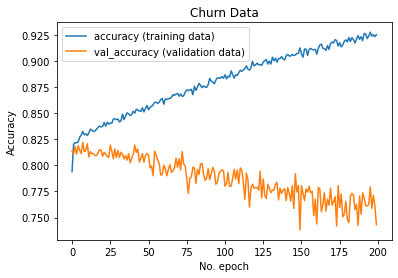

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot history: MAE
plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='val_accuracy (validation data)')
plt.title('Churn Data')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

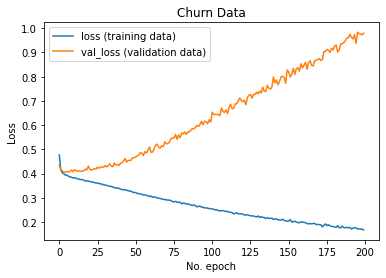

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot history: MAE
plt.plot(history.history['loss'], label='loss (training data)')
plt.plot(history.history['val_loss'], label='val_loss (validation data)')
plt.title('Churn Data')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

pred = clf_forest.predict(X_train)
print("Training accuracy", accuracy_score(y_train, pred))

pred_test = clf_forest.predict(X_test)
print("Test accuracy",accuracy_score(y_test, pred_test))

Training accuracy 0.864125
Test accuracy 0.8345
